66   0
[35, 43, 31, 49, 28, 53, 27, 56, 87, 113, 25, 61, 72, 124, 23, 65, 67, 133, 22, 136, 20, 141, 16, 146, 12, 150, 8, 153, 5, 157, 160, 164, 168, 169, 172, 180, 188, 193, 194, 195]
[63, 63, 62, 62, 61, 61, 60, 60, 60, 60, 59, 59, 59, 59, 58, 58, 58, 58, 57, 57, 56, 56, 55, 55, 54, 54, 53, 53, 52, 52, 51, 50, 49, 48, 47, 47, 46, 45, 44, 42]
[4, 5, 8, 20, 29, 50, 58, 60, 64, 70, 73, 77]
[52, 51, 49, 49, 50, 50, 50, 49, 46, 44, 43, 42]
[ 52.          51.92050022  51.84205361 ...,  42.01346025  42.00642325  42.        ]
[ 52.          52.07513597  52.14839248 ...,  42.91959352  42.48745253  42.        ]


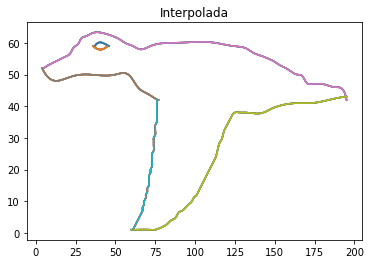

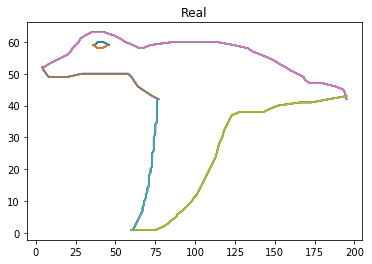

In [7]:
def mergeSort(alist1,alist2):
    if len(alist1)>1:
        mid = len(alist1)//2
        lefthalf = alist1[:mid]
        righthalf = alist1[mid:]
        l2 = alist2[:mid]
        r2 = alist2[mid:]
        mergeSort(lefthalf,l2)
        mergeSort(righthalf,r2)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist1[k]=lefthalf[i]
                alist2[k]=l2[i]
                i=i+1
            else:
                alist1[k]=righthalf[j]
                alist2[k]=r2[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist1[k]=lefthalf[i]
            alist2[k]=l2[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist1[k]=righthalf[j]
            alist2[k]=r2[j]
            j=j+1
            k=k+1
    #print("Merging ",alist1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

archivo = open("pato.txt","r")

lines = archivo.readlines()
iniy = len(lines)
inix = 0

xu=[]
yu=[]
xd1=[]
yd1=[]
xd2=[]
yd2=[]
xd3=[]
yd3=[]
xd4=[]
yd4=[]
xd5=[]
yd5=[]


print(iniy," ",inix)
for line in lines:
    inix = 0
    for c in line:
        if( c == '*' ):
            xu.append(inix)
            yu.append(iniy)
        elif( c == '1' ):
            xd1.append(inix)
            yd1.append(iniy)
        elif( c == '2' ):
            xd2.append(inix)
            yd2.append(iniy)
        elif( c == '0' ):
            xd3.append(iniy)
            yd3.append(inix)
        elif( c == '3' ):
            xd4.append(inix)
            yd4.append(iniy)
        elif( c == '4' ):
            xd5.append(inix)
            yd5.append(iniy)
        inix+=1
    iniy-=1
print(xu)
print(yu)

archivo.close();
mergeSort(xu,yu);
mergeSort(xd1,yd1);
mergeSort(xd2,yd2);
mergeSort(xd3,yd3);
mergeSort(xd4,yd4);
mergeSort(xd5,yd5);

print(xd1)
print(yd1)

xui = np.linspace(min(xu), max(xu), num=1001)  # Dominio
yu1d = np.interp(xui, xu, yu)
#yu1d = InterpolatedUnivariateSpline(xui, yui, k=1)(xu)  # Mismo resultado
yusp = InterpolatedUnivariateSpline(xu, yu)(xui)  # Llamamos a la clase con xu

xd1i = np.linspace(min(xd1), max(xd1), num=1001)  # Dominio
yd11d = np.interp(xd1i, xd1, yd1)
#yd11d = InterpolatedUnivariateSpline(xd1i, yd1i, k=1)(xd1)  # Mismo resultado
yd1sp = InterpolatedUnivariateSpline(xd1, yd1)(xd1i)  # Llamamos a la clase con xu

xd2i = np.linspace(min(xd2), max(xd2), num=1002)  # Dominio
yd22d = np.interp(xd2i, xd2, yd2)
#yd22d = InterpolatedUnivariateSpline(xd2i, yd2i, k=2)(xd2)  # Mismo resultado
yd2sp = InterpolatedUnivariateSpline(xd2, yd2)(xd2i)  # Llamamos a la clase con xu

xd3i = np.linspace(min(xd3), max(xd3), num=1003)  # Dominio
yd33d = np.interp(xd3i, xd3, yd3)
#yd33d = InterpolatedUnivariateSpline(xd3i, yd3i, k=3)(xd3)  # Mismo resultado
yd3sp = InterpolatedUnivariateSpline(xd3, yd3)(xd3i)  # Llamamos a la clase con xu

xd4i = np.linspace(min(xd4), max(xd4), num=1004)  # Dominio
# yd44d = np.interp(xd4i, xd4, yd4)
# #yd44d = InterpolatedUnivariateSpline(xd4i, yd4i, k=4)(xd4)  # Mismo resultado
yd4sp = InterpolatedUnivariateSpline(xd4, yd4)(xd4i)  # Llamamos a la clase con xu

xd5i = np.linspace(min(xd5), max(xd5), num=1005)  # Dominio
# yd55d = np.interp(xd5i, xd5, yd5)
# #yd55d = InterpolatedUnivariateSpline(xd5i, yd5i, k=5)(xd5)  # Mismo resultado
yd5sp = InterpolatedUnivariateSpline(xd5, yd5)(xd5i)  # Llamamos a la clase con xu



print(yd1sp)
print(yusp)

plt.figure(1)
plt.title("Interpolada")
plt.plot(xui,yusp)
plt.plot(xd1i,yd1sp)
plt.plot(xd2i,yd2sp)
plt.plot(yd3sp,xd3i)
plt.plot(xd4i,yd4sp)
plt.plot(xd5i,yd5sp)


plt.figure(2)
plt.title("Real")
plt.plot(xu,yu)
plt.plot(xd1,yd1)
plt.plot(xd2,yd2)
plt.plot(yd3,xd3)
plt.plot(xd4,yd4)
plt.plot(xd5,yd5)
plt.show()